# Case Studies: understand completely what is happening!
Do we find to types of events when we average everything out?

In [1]:
import unixFunctionsMITgcm_final as fc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Step1: Which event are we interested in?

In [122]:
#INITIALISATION

#Can only be done with one member now!
members=[18,19]
years=np.arange(1940, 1942)

In [3]:
#Reading the data.
full='/data/hpcdata/users/grejan/mitgcm/data'
total={}
units={}
longnames={}
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='isotherm')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='final')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='ohc')

Text(0.5, 1.0, 'Ocean Heat Content in Event of Interest')

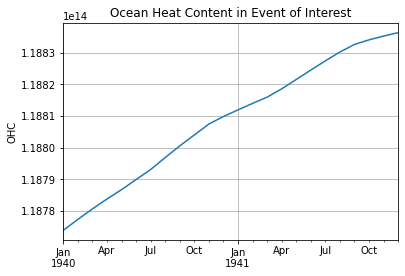

In [4]:
total['amundsen_shelf_ohc_below_0m']['ens06'].rolling(24).mean()[str(years[0]):str(years[-1])].plot(grid=True)
plt.ylabel('OHC')
plt.title('Ocean Heat Content in Event of Interest')

### Step 2: Load All Data

In [5]:
#How do we want to average everything?
window=24
deseasonalized=False

In [123]:
#Load Data that we already have
data={}
data_dt={}

var_list=['EXFuwind', 'THETA', 'UVEL', 'VVEL', 'THETAW106', 'THETAS72-5', 'UVELB', 'VVELB']
filenames={'EXFuwind':'zonal_winds', 
           'THETA':'new2_amundsen_shelf_temp_200to700', 
           'UVEL':'depth_averaged_UVEL', 
           'VVEL':'depth_averaged_VVEL',
           'curlTAU':'curl_tau', 
           'THETAW106':'theta_W106', 
           'THETAW120':'theta_W120',
           'THETAW103-5':'theta_W103-5',
           'THETAW100':'theta_W100',
           'THETAS72-5':'theta_S72-5',
           'UVELB':'bottom100m_averaged_UVEL', 
           'VVELB':'bottom100m_averaged_VVEL'}

for var in var_list: 
    print('Starting with: '+var)
    data[var]=fc.loadMITgcmData(filename=filenames[var], members=members)
    if 'VELB' in var:
        if 'U' in var:
            data[var]=data[var]-data['UVEL']
            data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'UVEL', window=window)
        elif 'VVEL' in var:
            data[var]=data[var]-data['VVEL']
            data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'VVEL', window=window)
    elif 'THETA' in var:
        data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'THETA', window=window)
    else:
        data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], var, window=window)
    
    
    

Starting with: EXFuwind
Loading number:18
Starting with: THETA
Loading number:18
Starting with: UVEL
Loading number:18
Starting with: VVEL
Loading number:18
Starting with: THETAW106
Loading number:18
Starting with: THETAS72-5
Loading number:18
Starting with: UVELB
Loading number:18
Starting with: VVELB
Loading number:18


In [ ]:
#Load Data that we do not have already.

# var_list=['EXFpress', 'UVEL', 'VVEL', 'SALT']


# for var in var_list:
#     print('Starting with: '+var)
#     data2=None
#     for year in np.arange(years[0]-13, years[-1]+13):
#         print(year)
#         data_xr=xr.open_dataset('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE{}/output/{}01/MITgcm/output.nc'.format(str(members[-1]).zfill(2), str(year)))    
#         if 'VEL' in var:
#             data_xr=data_xr.sel(Z=-405)
        
#         if 'SALT' in var:
#             data_xr=data_xr.sel(Z=-405)
         
#         if type(data2)==type(None):
#             data2=data_xr
#         else:
#             data2=xr.concat([data2, data_xr], dim='time')
#     data[var]=data2

# for var in list(data):
#     data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], var, window=window)


### Step 3: Show it all!

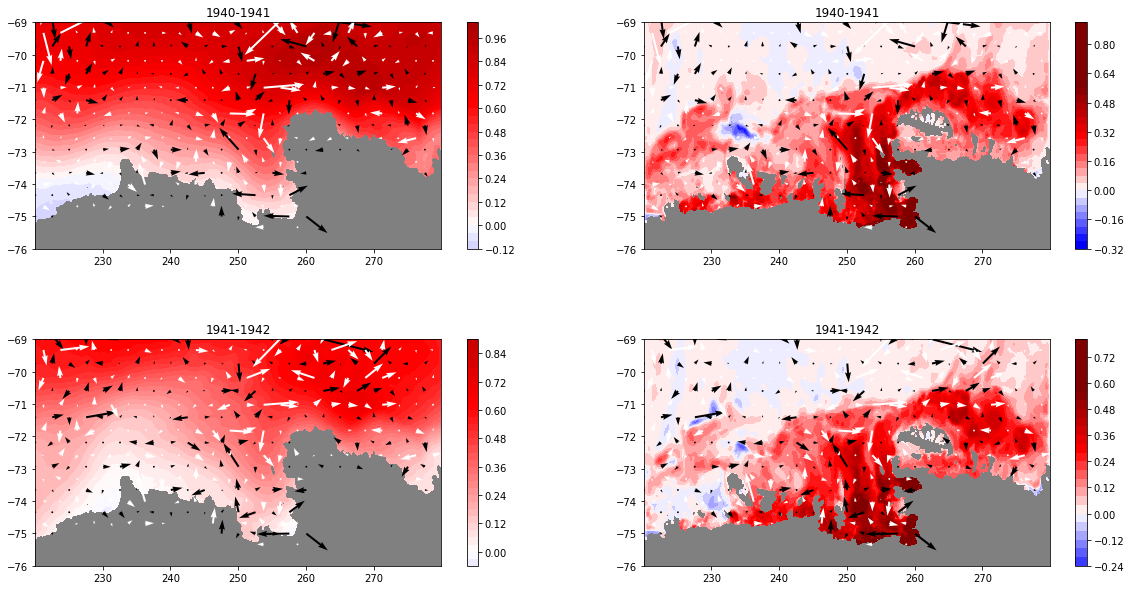

In [26]:
# voi=['EXFuwind', 'THETA'] #Variables of interest!


# fig, ax=plt.subplots(len(years),len(voi), figsize=(int(len(voi)*10), int(len(years)*5)))

# for j, var in enumerate(voi):
#     maxim=float(np.nanquantile(data_dt[var].sel(time=slice(str(years[0]),str(years[-1]))), 0.99))
#     for i, year in enumerate(years):
        
#         #img=ax[i,j].pcolor(data_dt[var].XC, data_dt[var].YC, data_dt[var].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values, cmap='seismic', vmin=-maxim, vmax=+maxim)
#         data_dt[var]=data_dt[var].where(data_dt[var]!=0)
#         xcor=[m for m in data_dt[var].coords if 'X' in m][0]
#         ycor=[m for m in data_dt[var].coords if 'Y' in m][0]
        
#         img=ax[i,j].contourf(data_dt[var][xcor], data_dt[var][ycor], data_dt[var].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values, cmap='seismic', vmin=-maxim, vmax=+maxim, levels=30)

#         plt.colorbar(img, ax=ax[i,j])
#         ax[i,j].set_title(str(year)+'-'+str(year+1))
#         ax[i,j].set_ylim([-76, -69])
        
#         step=25
#         ax[i,j].quiver(data_dt[var][xcor][::step], data_dt[var][ycor][::step], 
#                        data_dt['UVEL'].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values[::step, ::step], 
#                        data_dt['VVEL'].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values[::step, ::step], 
#                        color='black', width=0.005)
        
#         ax[i,j].quiver(data_dt[var][xcor][int(step/2)::step], data_dt[var][ycor][int(step/2)::step], 
#                        data_dt['UVEL'].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values[int(step/2)::step, int(step/2)::step], 
#                        data_dt['VVEL'].sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values[int(step/2)::step, int(step/2)::step], 
#                        color='white', width=0.005)
#         ax[i,j].set_facecolor('grey')
# fig.subplots_adjust(wspace=0.2, hspace=0.4)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


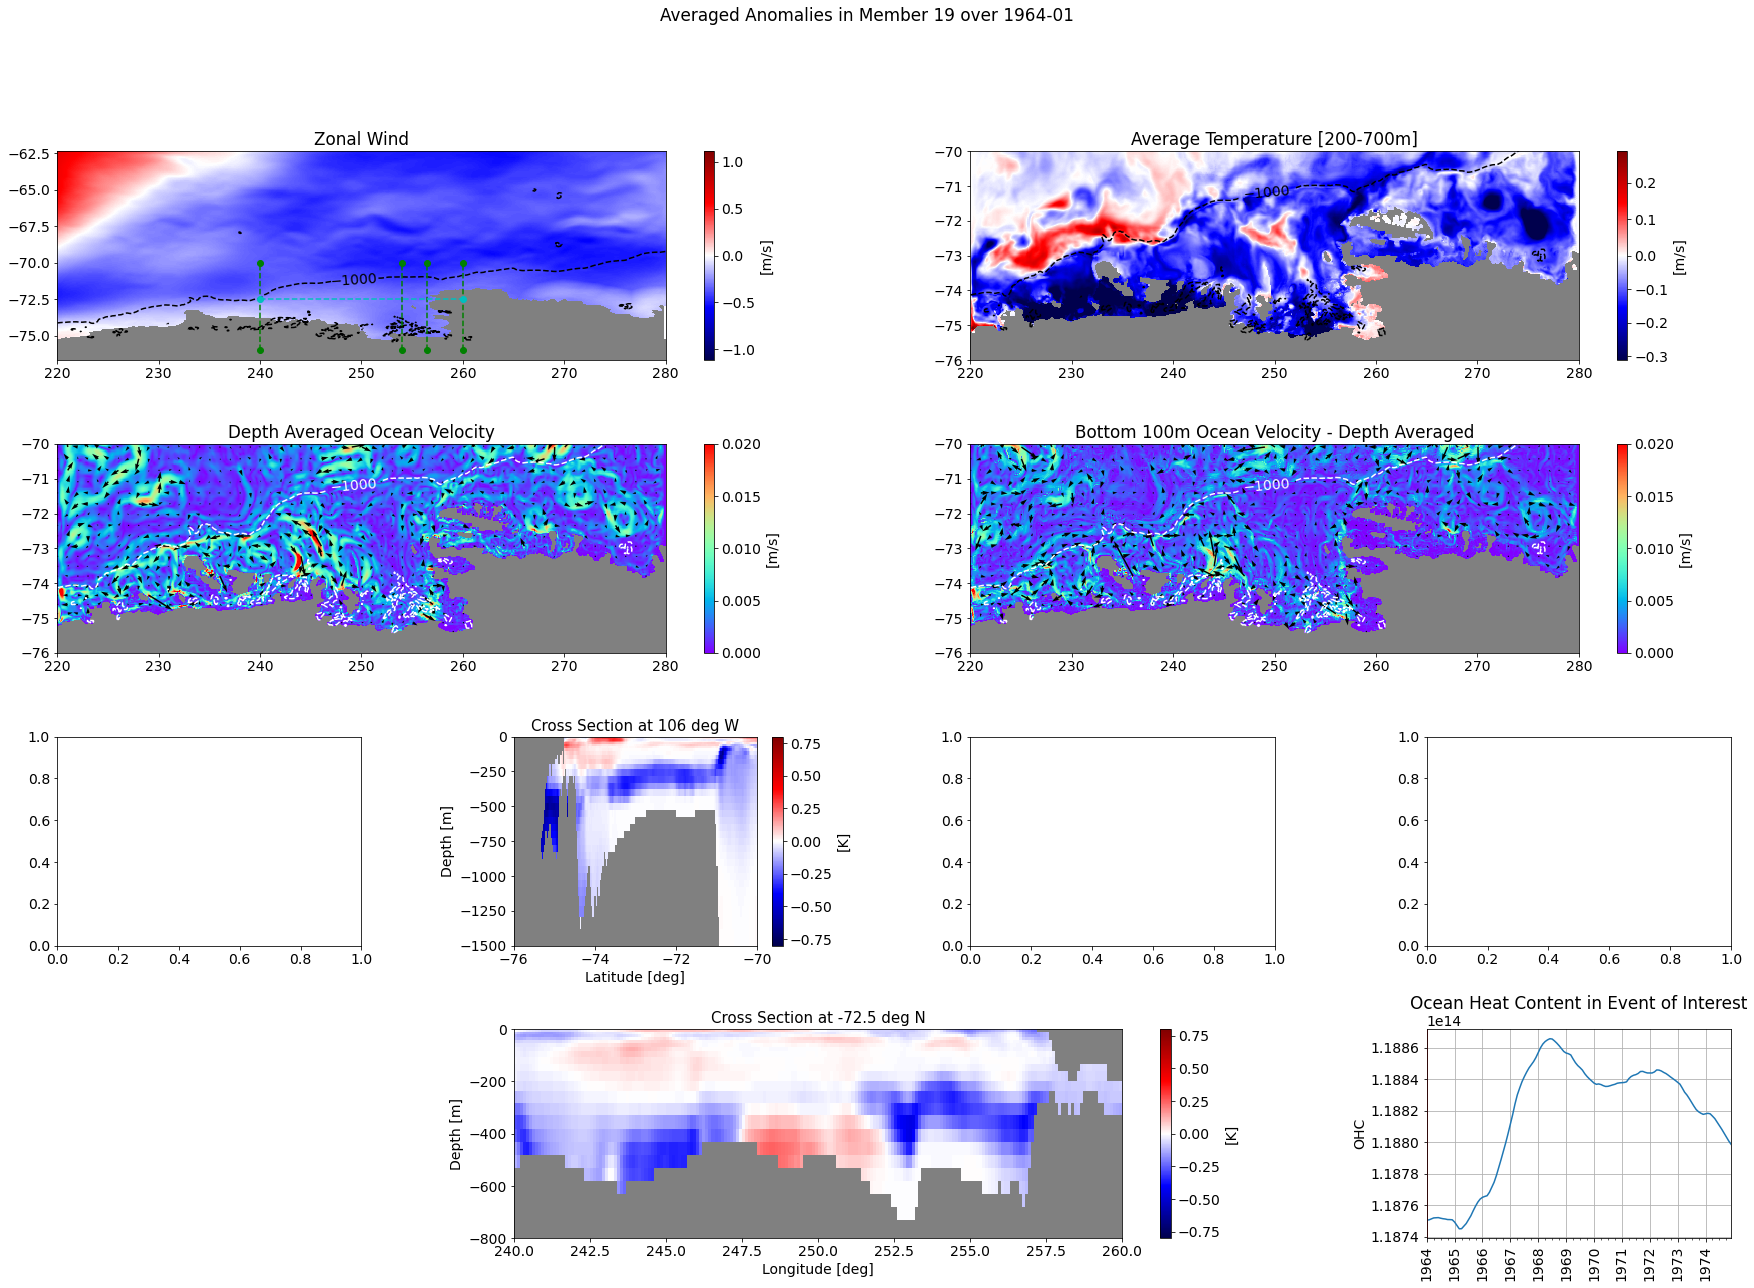

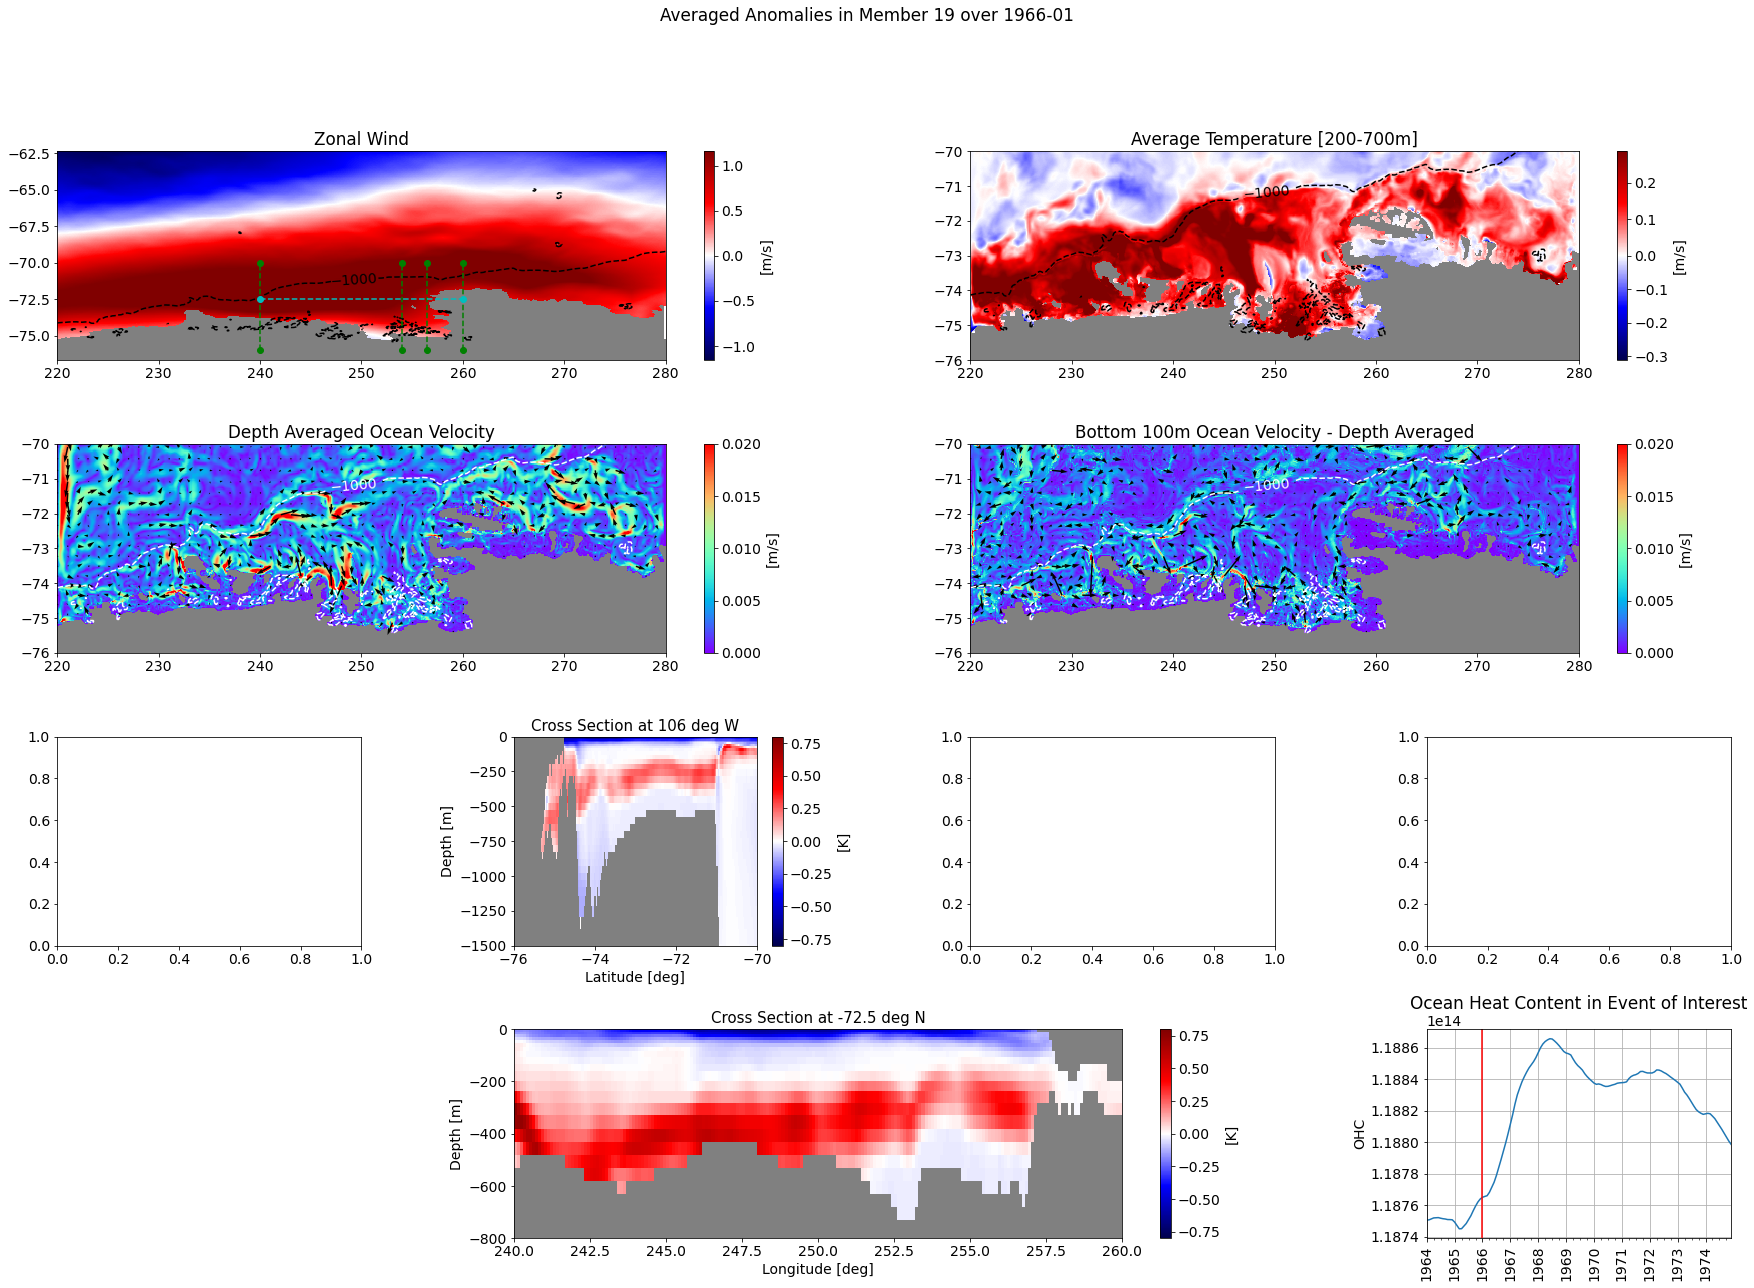

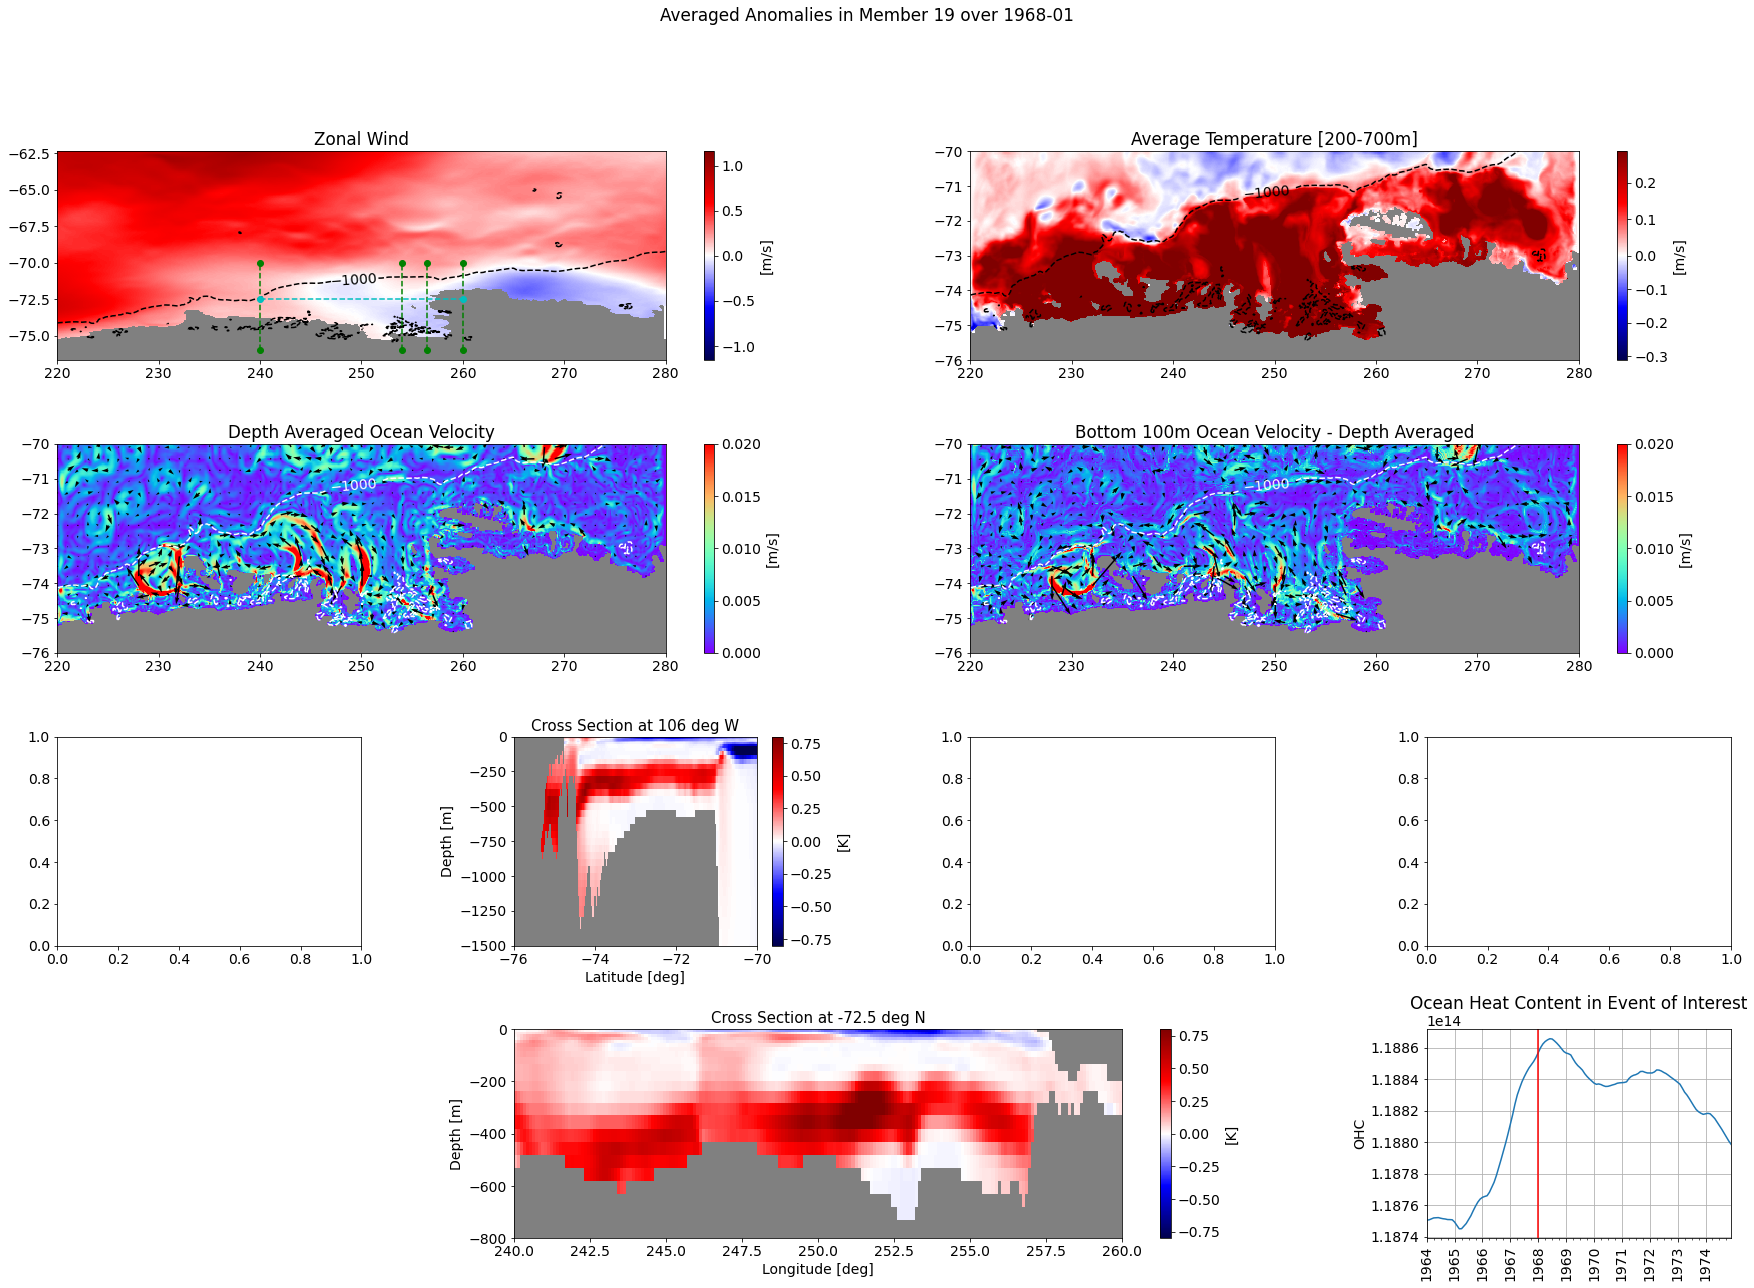

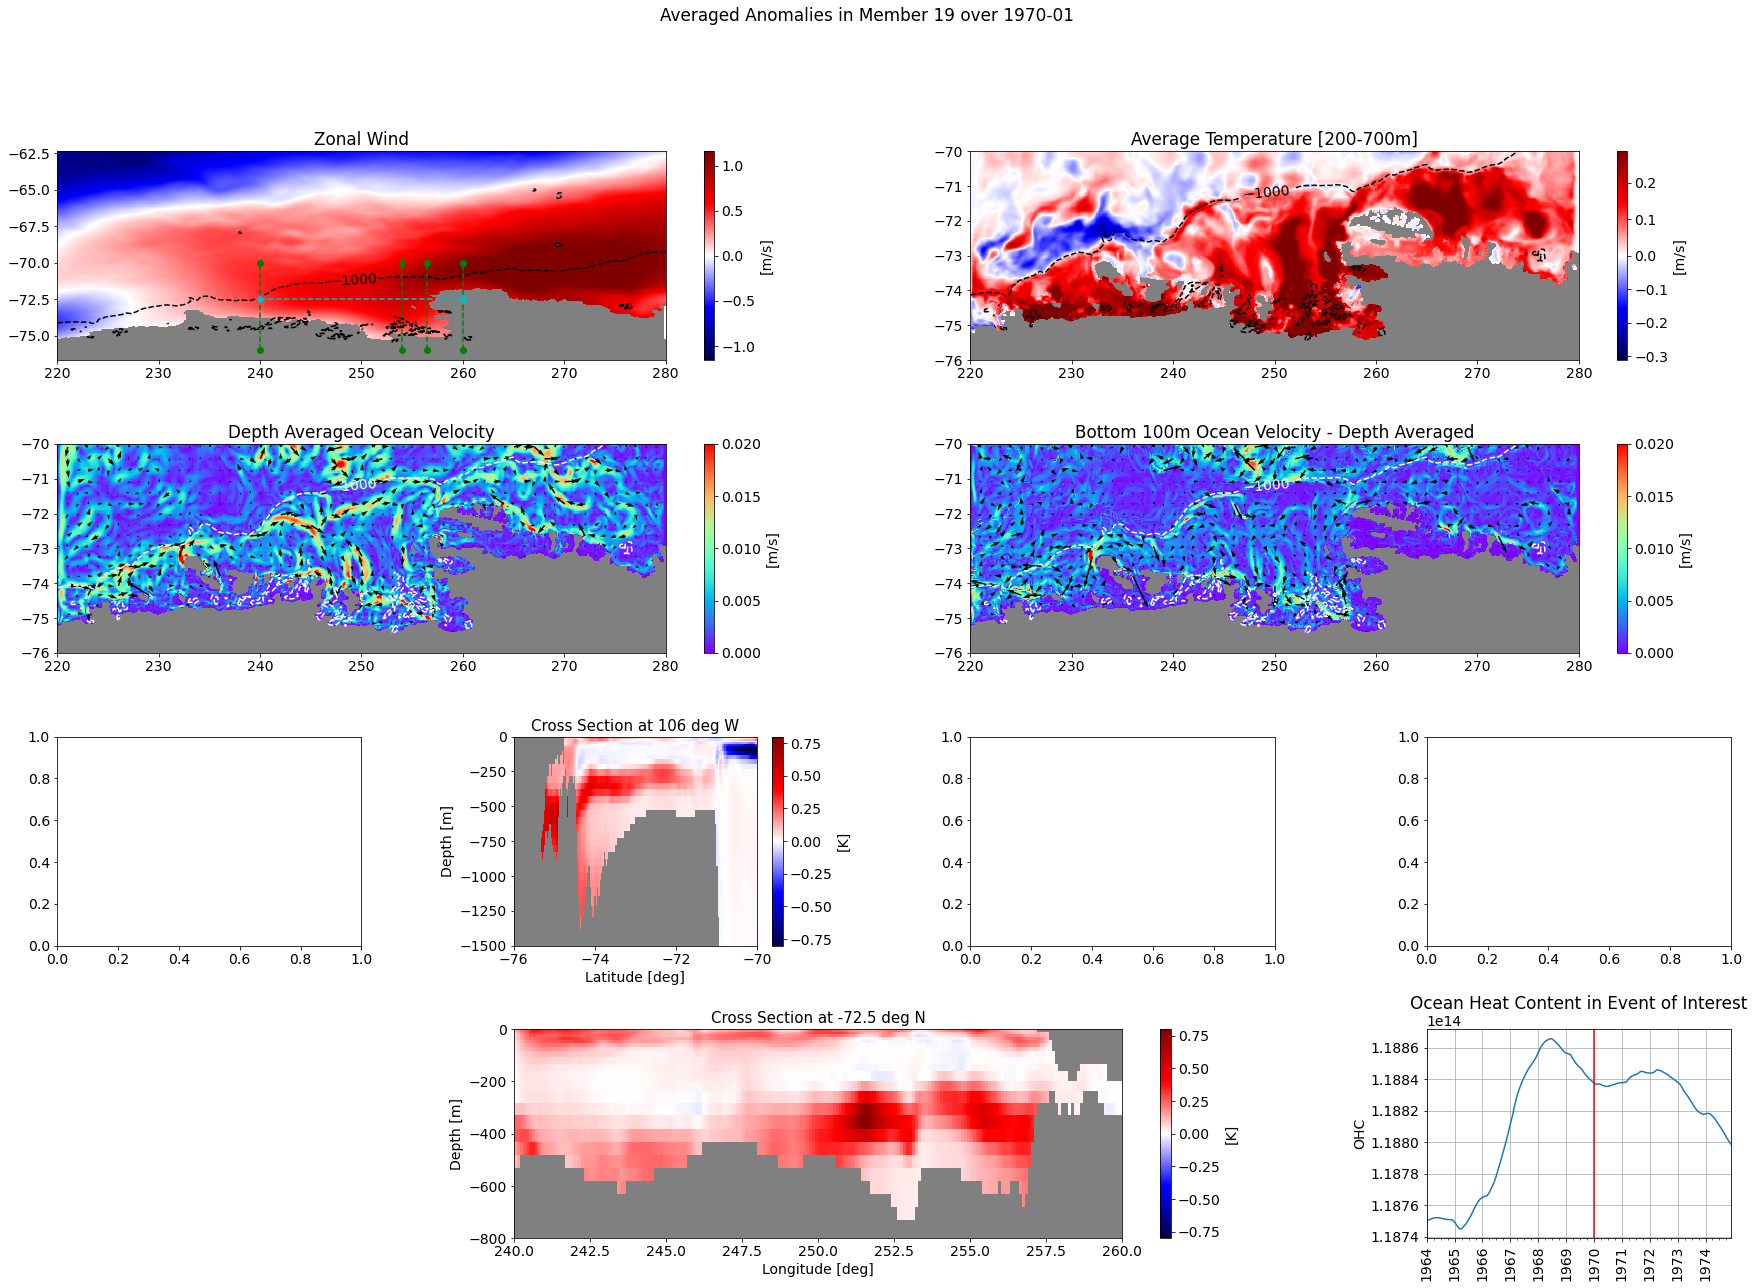

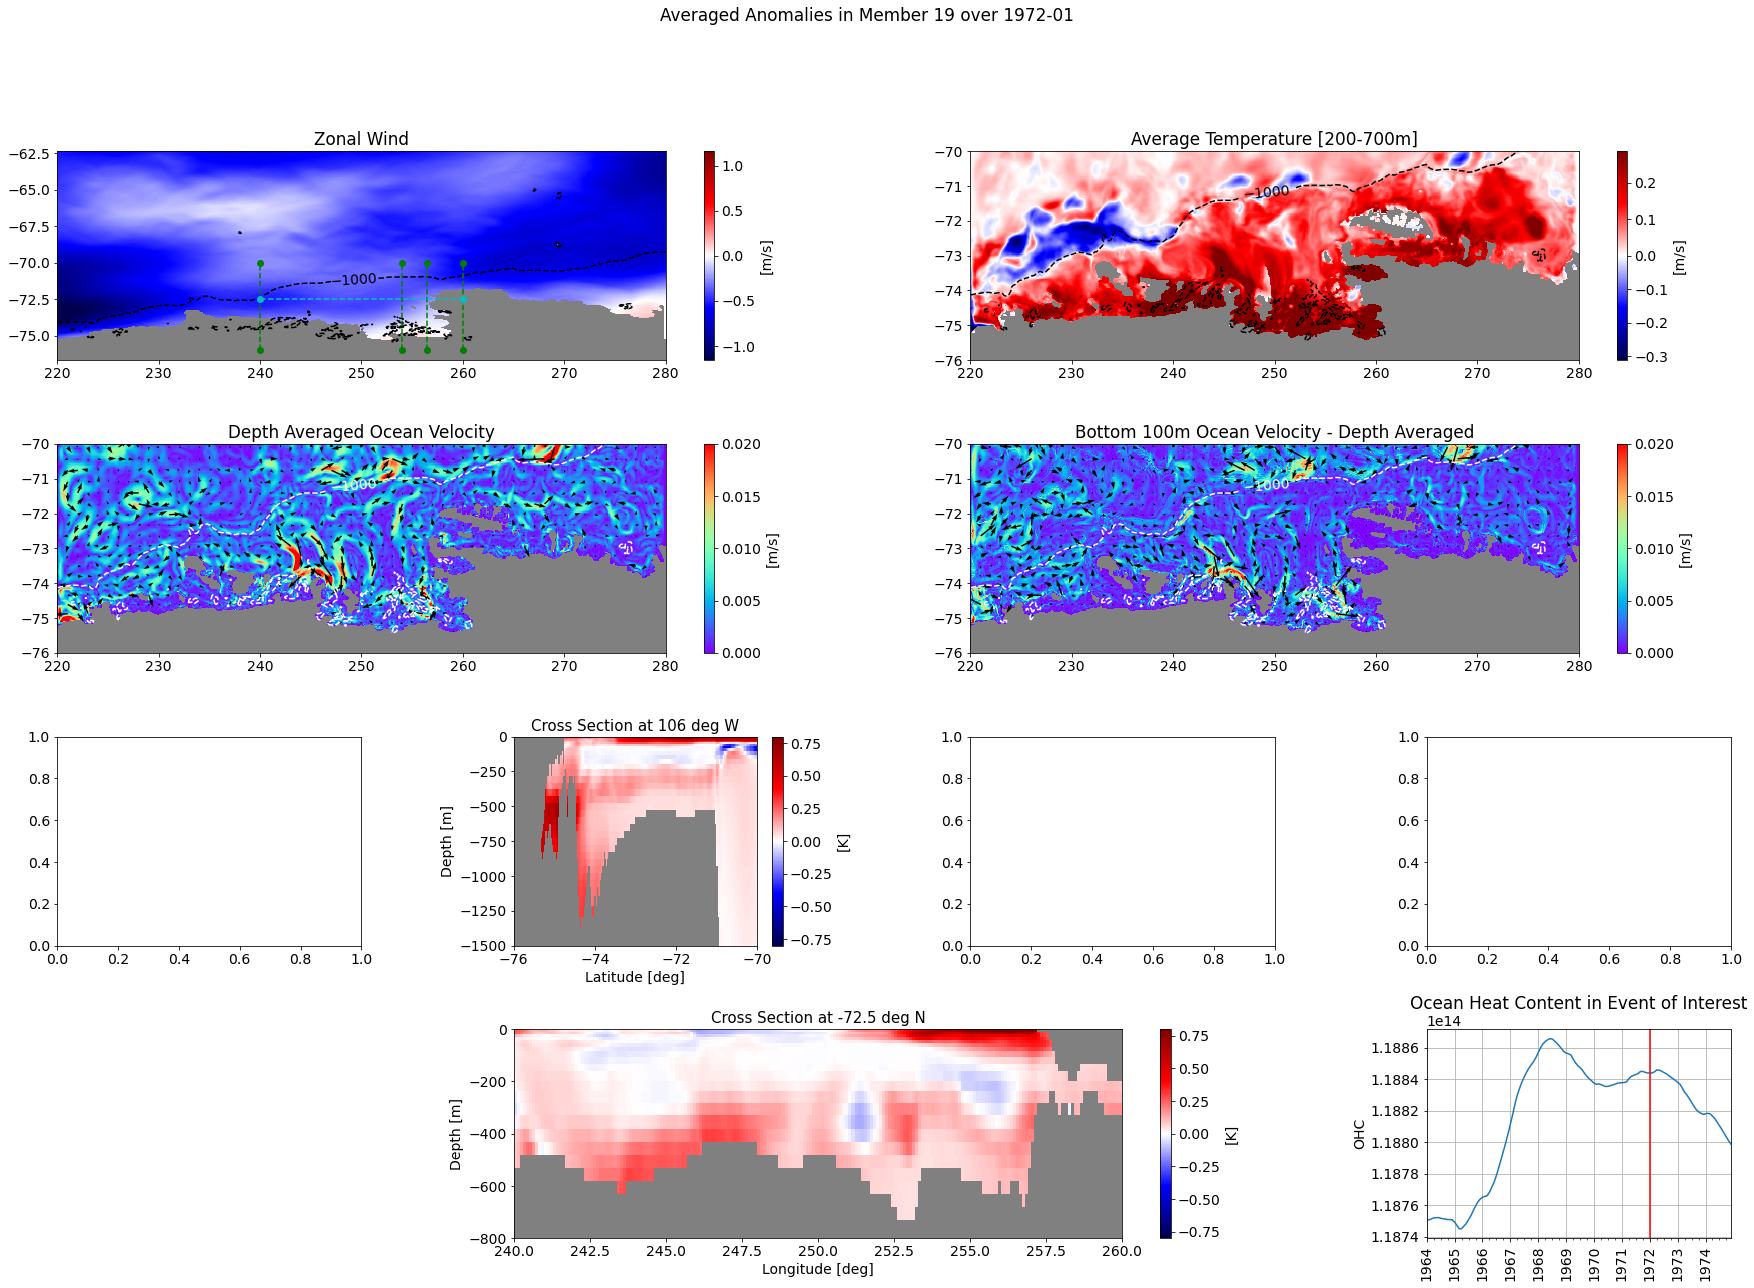

In [124]:
def showOverview(i, save=False):
    import matplotlib.colors as colors
    plt.rcParams.update({'font.size': 14})
    
    start_year=1964
    import pandas as pd
    a=pd.to_datetime(str(start_year))+pd.DateOffset(months=i)
    year=a.strftime('%Y-%m')

    import matplotlib.gridspec as gridspec
    #plt.figure(figsize=(30,10))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.5)
    ax1 = plt.subplot(gs[0, :2])
    ax2 = plt.subplot(gs[0, 2:])
    ax3 = plt.subplot(gs[1, :2])
    ax4 = plt.subplot(gs[1, 2:])
    ax5 = plt.subplot(gs[2, 0])
    ax6 = plt.subplot(gs[2, 1])
    ax7 = plt.subplot(gs[2, 2])
    ax8 = plt.subplot(gs[2, 3])
    ax9 = plt.subplot(gs[3, 1:3])
    ax10 = plt.subplot(gs[3, 3])

    from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid
    gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
    grid = Grid(gp)


    var='EXFuwind'
    
    xcor=[m for m in data_dt[var].coords if 'X' in m][0]
    ycor=[m for m in data_dt[var].coords if 'Y' in m][0]

    divnorm = colors.TwoSlopeNorm(vcenter=0, vmin=np.nanpercentile(data_dt[var], 1), vmax=np.nanpercentile(data_dt[var], 99))

    data_dt[var]=data_dt[var].where(data_dt[var]!=0)
    img=ax1.pcolor(data_dt[var][xcor], data_dt[var][ycor], data_dt[var].sel(time=year).mean(dim='time').mean(dim='ens').values, cmap='seismic', norm=divnorm)
    ax1.set_facecolor('grey')
    bath=ax1.contour(data_dt[var][xcor], data_dt[var][ycor], grid.bathy, levels=[-1000], colors=['black'])
    plt.clabel(bath, [-1000])
    plt.colorbar(img, label='[m/s]', ax=ax1)
    ax1.set_title('Zonal Wind')

    x=[360-120, 360-120]
    y=[-76, -70]
    ax1.plot(x, y, 'o--g')

    x=[360-106, 360-106]
    y=[-76, -70]
    ax1.plot(x, y, 'o--g')
    
    x=[360-103.5, 360-103.5]
    y=[-76, -70]
    ax1.plot(x, y, 'o--g')
    
    x=[360-100, 360-100]
    y=[-76, -70]
    ax1.plot(x, y, 'o--g')
    
    x=[240, 260]
    y=[-72.5, -72.5]
    ax1.plot(x, y, 'o--c')


    var='THETA'
    divnorm = colors.TwoSlopeNorm(vcenter=0, vmin=np.nanpercentile(data_dt[var], 1), vmax=np.nanpercentile(data_dt[var], 99))
    img=ax2.pcolor(data_dt[var][xcor], data_dt[var][ycor], data_dt[var].sel(time=year).mean(dim='time').mean(dim='ens').values, cmap='seismic', norm=divnorm)
    plt.colorbar(img, label='[m/s]', ax=ax2)
    ax2.set_facecolor('grey')
    bath=ax2.contour(data_dt[var][xcor], data_dt[var][ycor], grid.bathy, levels=[-1000], colors=['black'])
    plt.clabel(bath, [-1000])
    ax2.set_title('Average Temperature [200-700m]')
    ax2.set_ylim([-76, -70])
    
    
    var1='UVEL'
    var2='VVEL'
    vfield=np.sqrt(data_dt[var1].sel(time=year).mean(dim='time').mean(dim='ens').values**2
                   +data_dt[var2].sel(time=year).mean(dim='time').mean(dim='ens').values**2)

    img=ax3.pcolor(data_dt[var][xcor], data_dt[var][ycor], vfield, cmap='rainbow', vmax=0.02)
    plt.colorbar(img, label='[m/s]', ax=ax3)
    ax3.set_facecolor('grey')
    step=10
    ax3.quiver(data_dt[var][xcor][::step], data_dt[var][ycor][::step], 
                   data_dt['UVEL'].sel(time=year).mean(dim='time').mean(dim='ens').values[::step, ::step], 
                   data_dt['VVEL'].sel(time=year).mean(dim='time').mean(dim='ens').values[::step, ::step], 
                   color='black')
    bath=ax3.contour(data_dt[var][xcor], data_dt[var][ycor], grid.bathy, levels=[-1000], colors=['white'])
    plt.clabel(bath, [-1000])
    ax3.set_ylim([-76, -70])
    ax3.set_title('Depth Averaged Ocean Velocity')
    
    
    var1='UVELB'
    var2='VVELB'
    vfield=np.sqrt(data_dt[var1].sel(time=year).mean(dim='time').mean(dim='ens').values**2
                   +data_dt[var2].sel(time=year).mean(dim='time').mean(dim='ens').values**2)

    img=ax4.pcolor(data_dt[var][xcor], data_dt[var][ycor], vfield, cmap='rainbow', vmax=0.02)
    plt.colorbar(img, label='[m/s]', ax=ax4)
    ax4.set_facecolor('grey')
    step=10
    ax4.quiver(data_dt[var][xcor][::step], data_dt[var][ycor][::step], 
                   data_dt['UVELB'].sel(time=year).mean(dim='time').mean(dim='ens').values[::step, ::step], 
                   data_dt['VVELB'].sel(time=year).mean(dim='time').mean(dim='ens').values[::step, ::step], 
                   color='black')
    bath=ax4.contour(data_dt[var][xcor], data_dt[var][ycor], grid.bathy, levels=[-1000], colors=['white'])
    plt.clabel(bath, [-1000])
    ax4.set_ylim([-76, -70])
    ax4.set_title('Bottom 100m Ocean Velocity - Depth Averaged')
    
    
    
    
    
    #plotLonSlice(data_dt['THETAW120'], var='THETA', ax=ax6, year=year, filename='', x=120)
    plotLonSlice(data_dt['THETAW106'], var='THETA', ax=ax6, year=year, filename='', x=106)
    #plotLonSlice(data_dt['THETAW103-5'], var='THETA', ax=ax7, year=year, filename='', x=103.5)
    #plotLonSlice(data_dt['THETAW100'], var='THETA', ax=ax8, year=year, filename='', x=100)
    
    plotLatSlice(data_dt['THETAS72-5'], var='THETA', ax=ax9, year=year, filename='', y=-72.5)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.suptitle('Averaged Anomalies in Member '+str(members[-1])+' over ' +year)
    
    #years=[1935, 1945]
    total['amundsen_shelf_ohc_below_0m']['ens%02d' % (members[-1],)].rolling(24).mean()[str(start_year):str(start_year+10)].plot(grid=True, ax=ax10, rot=90)
    ax10.set_ylabel('OHC')
    ax10.set_title('Ocean Heat Content in Event of Interest', pad=20)
    ax10.axvline(x=total['amundsen_shelf_ohc_below_0m'].loc[year].index[0], color='r')
    
    if save==True:
        
        from datetime import date
        today = date.today()
        today=today.strftime("%Y%m%d")
        plt.savefig('./figures/'+today+'_overview_ens%02d' % (members[-1],)+'_'+year+'.png')

    return

plt.figure(figsize=(30,20))
showOverview(0*12, save=True)
plt.figure(figsize=(30,20))
showOverview(2*12, save=True)
plt.figure(figsize=(30,20))
showOverview(4*12, save=True)
plt.figure(figsize=(30,20))
showOverview(6*12, save=True)
plt.figure(figsize=(30,20))
showOverview(8*12, save=True)
#plt.figure(figsize=(30,20))
#showOverview(10*12, save=True)
# plt.figure(figsize=(30,20))
# showOverview(6*12)

#showOverview(1937)
#showOverview(1938)
#showOverview(1939)
#showOverview(1940)

In [93]:
def plotLonSlice(data, var, ax, year, unit='[K]', filename='', x=106):
    import matplotlib.colors as colors 
    
    a=data.sel(time=year).mean(dim='time').mean(dim='ens')
    a=a.where(a != 0) 

    ax.set_xlim([-76, -70])
    ax.set_ylim([-1500, 0])

    divnorm = colors.TwoSlopeNorm(vcenter=0, vmin=-0.8, vmax=0.8)
    
    img=ax.pcolormesh(a.YC, a.Z, a, cmap='seismic', norm=divnorm)
    plt.colorbar(img, label=unit, ax=ax)
    ax.set_facecolor('grey')
    ax.set_title('Cross Section at {} deg W'.format(str(x)), fontsize=15)
    ax.set_xlabel('Latitude [deg]', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)

    return

def plotLatSlice(data, var, ax, year, unit='[K]', filename='', y=-72.5):
    import matplotlib.colors as colors 
    
    a=data.sel(time=year).mean(dim='time').mean(dim='ens')
    a=a.where(a != 0) 

    ax.set_xlim([360-120, 360-100])
    ax.set_ylim([-800, 0])

    divnorm = colors.TwoSlopeNorm(vcenter=0, vmin=-0.8, vmax=0.8)
    
    img=ax.pcolormesh(a.XC, a.Z, a, cmap='seismic', norm=divnorm)
    plt.colorbar(img, label=unit, ax=ax)
    ax.set_facecolor('grey')
    ax.set_title('Cross Section at {} deg N'.format(str(y)), fontsize=15)
    ax.set_xlabel('Longitude [deg]', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)

    return


In [19]:
data_dt['THETAW106'].sel(time='1939')


<xarray.DataArray 'THETA' (ens: 1, time: 12, Z: 50, YC: 384)>
array([[[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           3.6638141e-02,  1.4824390e-02,  5.3644180e-06],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           3.2036185e-02,  1.2874484e-02, -3.5762787e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           2.6101351e-02,  1.2141943e-02, -9.5367432e-07],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           1.8147752e-05,  4.0695071e-05, -5.1222742e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           2.7850270e-05,  4.0190294e-05, -8.0093741e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00, -8.5681677e-08]],

        [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           2.5723338e-02,  1.0152578e-02,  5.3644180e-06],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           2.2930622e-02,  9.6291304e-03, -3.5762787e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           1.9789338e-02,  1.0265827e-02, -9.5367432e-07],
...
           2.7599744e-05,  4.2995438e-05, -5.1222742e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           1.1380762e-06,  2.8176233e-05, -8.0093741e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00, -8.5681677e-08]],

        [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           7.9032183e-03,  4.6616793e-03,  5.3644180e-06],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           7.8454018e-03,  3.5008192e-03, -3.5762787e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           8.4813833e-03,  3.7022829e-03, -9.5367432e-07],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           4.6588480e-05,  3.9060600e-05, -5.1222742e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -2.9932708e-06,  2.3541972e-05, -8.0093741e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00, -8.5681677e-08]]]],
      dtype=float32)
Coordinates:
    iter     (time) int64 2575440 2579904 2583936 ... 2614752 2619216 2623536
  * time     (time) object 1939-01-01 00:00:00 ... 1939-12-01 00:00:00
    XC       float32 253.9
  * YC       (YC) float32 -75.64 -75.61 -75.59 -75.56 ... -62.48 -62.44 -62.39
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -4.86e+03 -5.16e+03 -5.46e+03
    Depth    (YC) float32 0.0 0.0 0.0 0.0 ... 5.109e+03 5.113e+03 5.114e+03
    rA       (YC) float32 7.604e+06 7.617e+06 7.66e+06 ... 2.642e+07 2.652e+07
    PHrefC   (Z) float32 49.05 147.1 245.2 ... 4.768e+04 5.062e+04 5.356e+04
    drF      (Z) float32 10.0 10.0 10.0 10.0 12.0 ... 300.0 300.0 300.0 300.0
    hFacC    (Z, YC) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Dimensions without coordinates: ens

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

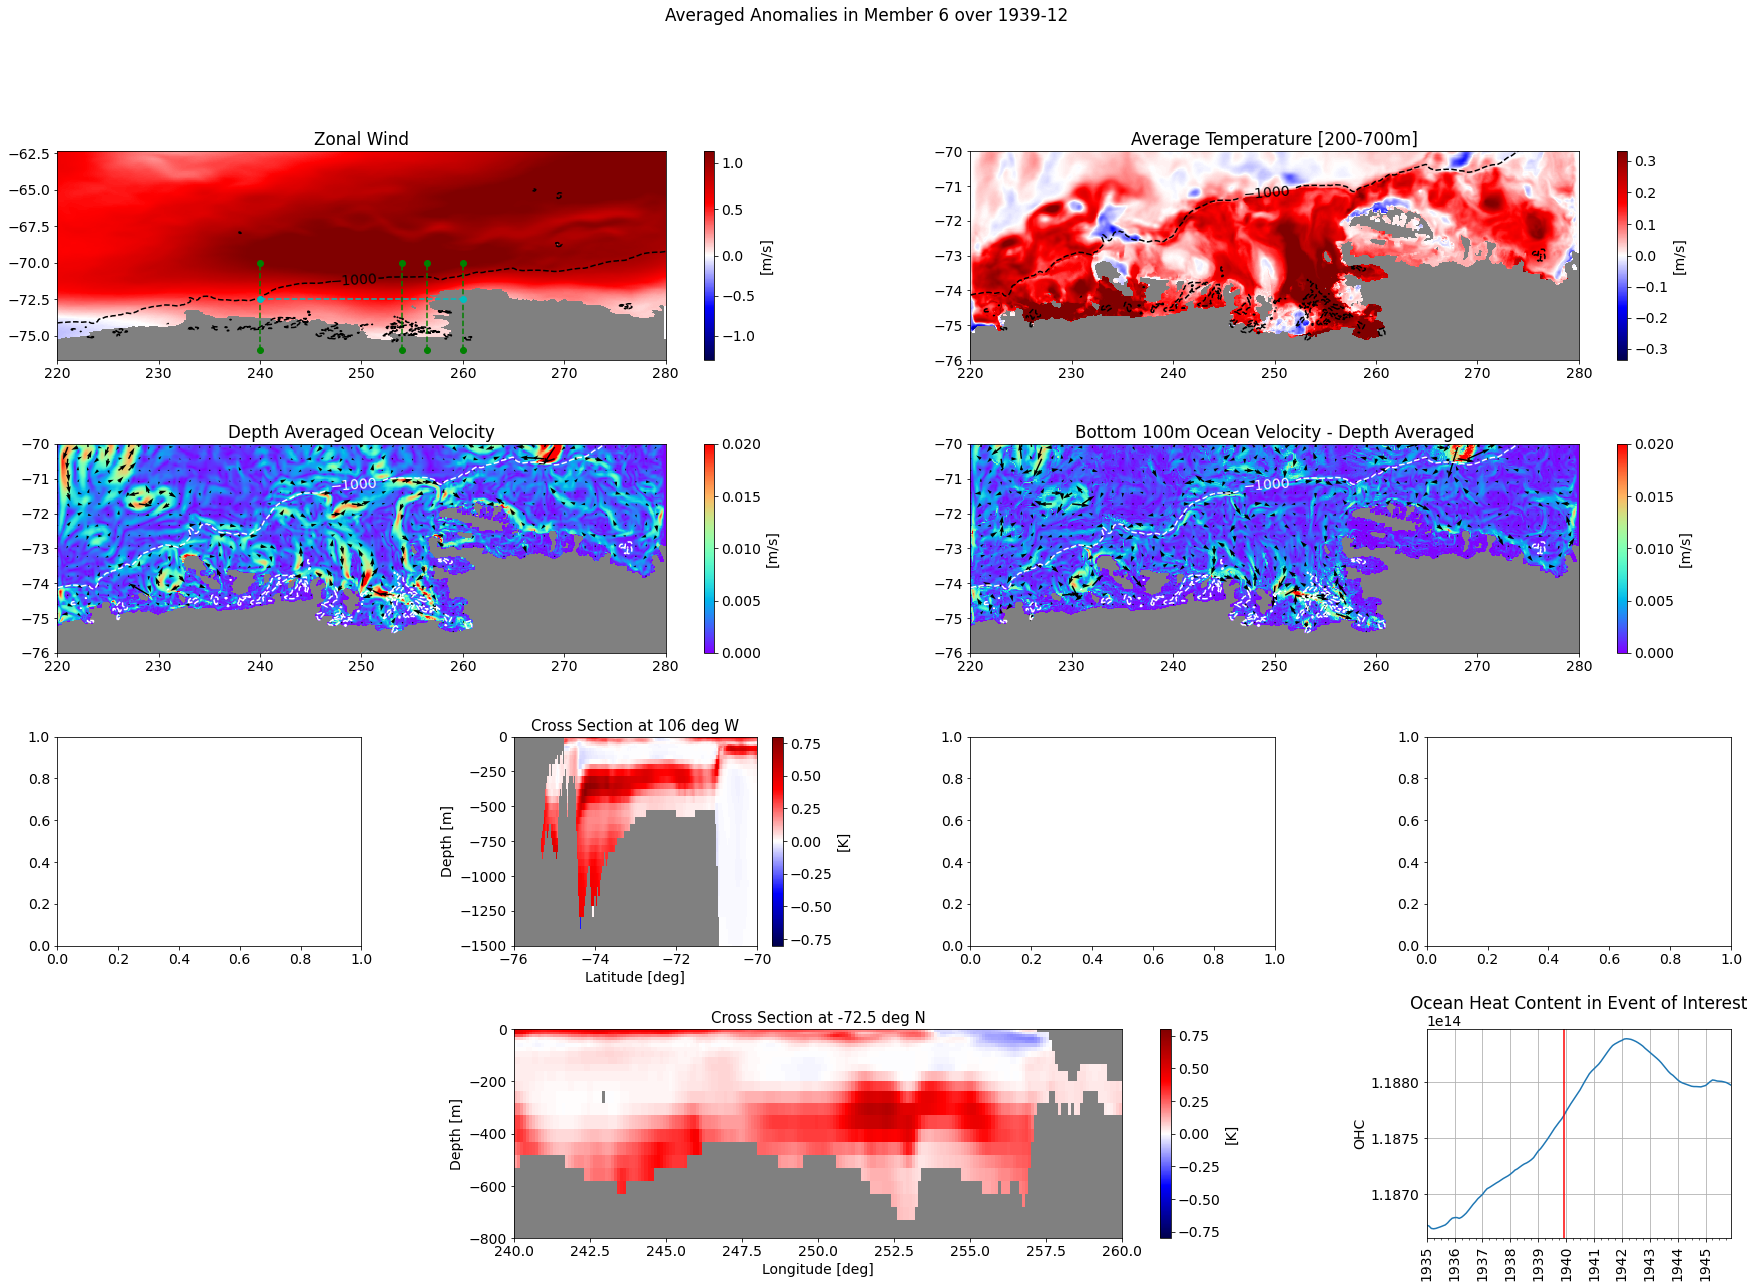

In [96]:
import matplotlib.animation as animation

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

fig=plt.figure(figsize=(30,20))
filename='test'
anim = animation.FuncAnimation(fig, showOverview, frames=12*5, repeat=False, interval=5000)
writergif = animation.PillowWriter(fps=2)
anim.save('./figures/animation_overview_'+filename+'_'+today+'.gif', writer=writergif)

In [91]:
year='1939-01' 
np.shape(data_dt[var].sel(time=year).mean(dim='time').mean(dim='ens').values)

(384, 600)

In [ ]:
var='EXFuwind'
zonwind=fc.loadMITgcmData(filename='zonal_winds', members=members)
zonwind_dt=fc.detrend_and_average_MITgcmData(zonwind, var, window=window)

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle(var+' in Ensemble Member '+str(members[-1]))

maxim=float(np.nanquantile(data_dt.sel(time=slice(str(years[0]),str(years[-1]))), 0.99))

for i, year in enumerate(years):
    plt.subplot(4,3,i+1)
    plt.pcolor(data_dt.XC, data_dt.YC, data_dt.sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values, cmap='seismic', vmin=-maxim, vmax=+maxim)
    plt.colorbar()
    plt.title(str(year)+'-'+str(year+1))
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [ ]:
#%% INITIALISATION
members=[5,6]
var='EXFuwind'
# #Loading the data.
data1=fc.loadMITgcmData(filename='zonal_winds', members=members)

window=24
data_dt1=fc.detrend_and_average_MITgcmData(data1, var, window=window)


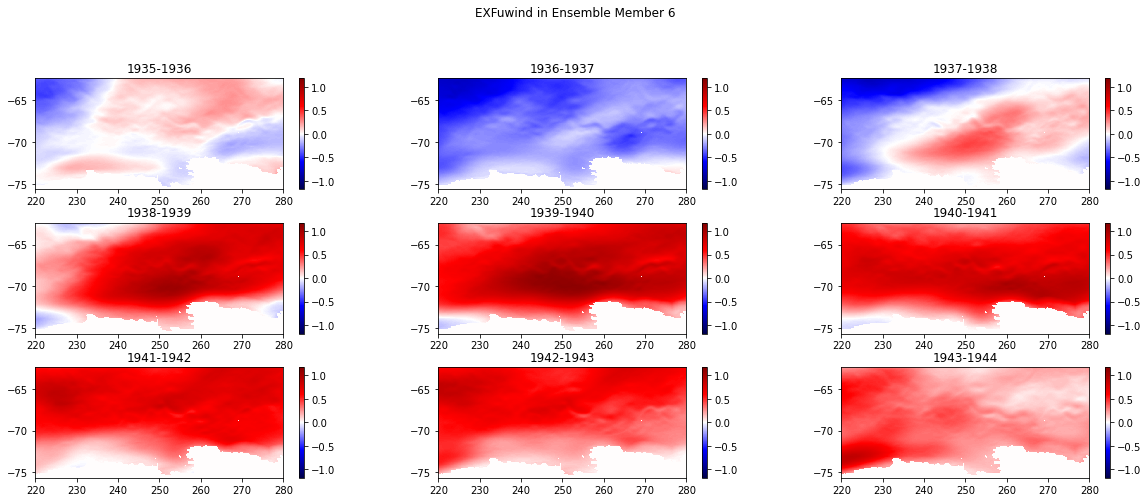

In [56]:
plt.figure(figsize=(20,10))
plt.suptitle(var+' in Ensemble Member '+str(members[-1]))

maxim=float(np.nanquantile(data_dt1.sel(time=slice(str(years[0]),str(years[-1]))), 0.99))

for i, year in enumerate(years):
    plt.subplot(4,3,i+1)
    plt.pcolor(data_dt1.XC, data_dt1.YC, data_dt1.sel(time=slice(str(year),str(year+1))).mean(dim='time').mean(dim='ens').values, cmap='seismic', vmin=-maxim, vmax=+maxim)
    plt.colorbar()
    plt.title(str(year)+'-'+str(year+1))
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [73]:
total['amundsen_shelf_ohc_below_0m'].loc[str(1939)].index[0]

Timestamp('1939-01-01 00:00:00')

In [78]:





data2=None
for year in [1936, 1937, 1938, 1939, 1940, 1941]:
    print('hoi!')
    data_xr=xr.open_dataset('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE01/output/{}01/MITgcm/output.nc'.format(str(year)))
    data_xr=data_xr['ADVy_TH'].sel(Z=-405)
    if type(data2)==type(None):
        data2=data_xr
    else:
        data2=xr.concat([data2, data_xr], dim='time')


hoi!
hoi!
hoi!
hoi!
hoi!
hoi!


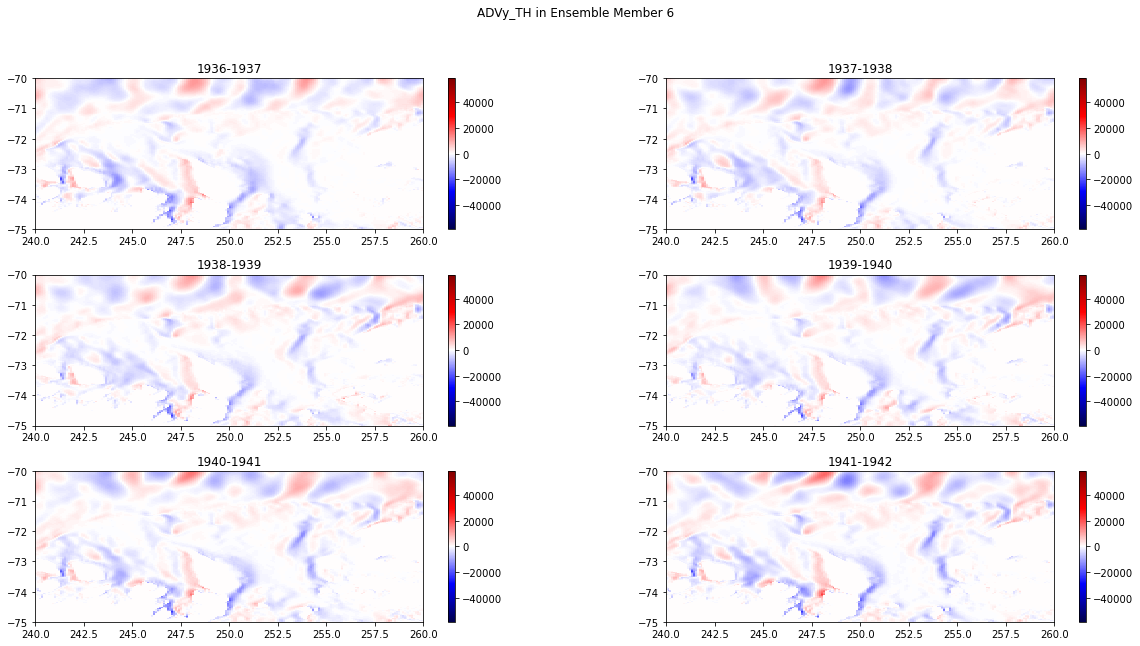

In [79]:
var='ADVy_TH'

plt.figure(figsize=(20,10))
plt.suptitle(var+' in Ensemble Member '+str(members[-1]))

maxim=float(np.nanquantile(data2.sel(time=slice(str(years[0]),str(years[-1]))), 0.99))

for i, year in enumerate([1936, 1937, 1938, 1939, 1940, 1941]):
    plt.subplot(3,2,i+1)
    plt.pcolor(data2.XC, data2.YG, data2.sel(time=slice(str(year),str(year+1))).mean(dim='time').values, cmap='seismic', vmin=-maxim, vmax=+maxim)
    plt.colorbar()
    plt.title(str(year)+'-'+str(year+1))
    plt.xlim([240, 260])
    plt.ylim([-75, -70])
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [68]:
data3=None
for year in [1936, 1937, 1938, 1939]:
    print('hoi!')
    data_xr=xr.open_dataset('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE01/output/{}01/MITgcm/output.nc'.format(str(year)))
    data_xr=data_xr['ADVx_TH'].sel(Z=-405)
    if type(data3)==type(None):
        data3=data_xr
    else:
        data3=xr.concat([data3, data_xr], dim='time')


hoi!
hoi!
hoi!
hoi!


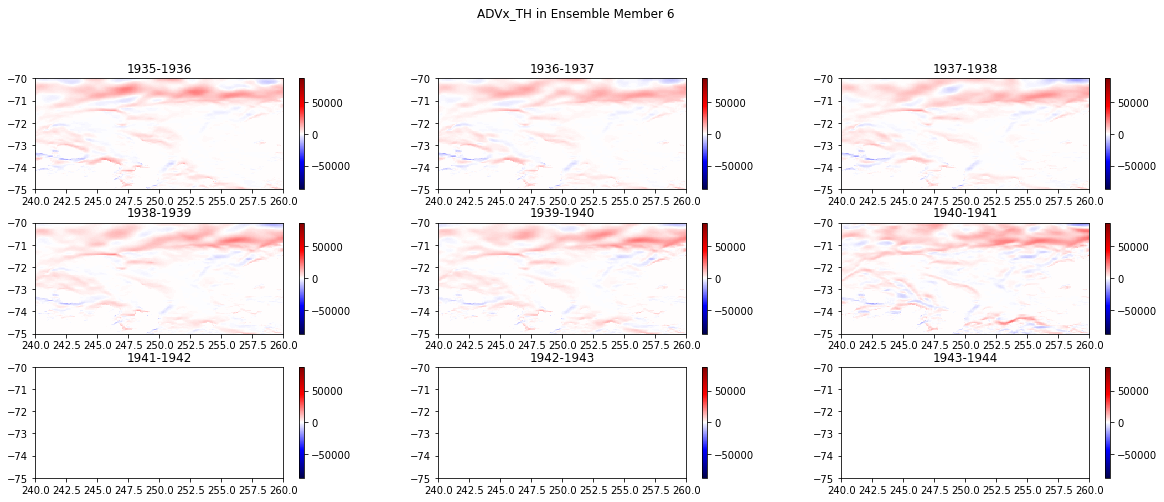

In [73]:
var='ADVx_TH'

plt.figure(figsize=(20,10))
plt.suptitle(var+' in Ensemble Member '+str(members[-1]))

maxim=float(np.nanquantile(data3.sel(time=slice(str(years[0]),str(years[-1]))), 0.99))

for i, year in enumerate([1936, 1937, 1938, 1939]):
    plt.subplot(4,3,i+1)
    plt.pcolor(data3.XG, data3.YC, data3.sel(time=slice(str(year),str(year+1))).mean(dim='time').values, cmap='seismic', vmin=-maxim, vmax=+maxim)
    plt.colorbar()
    plt.title(str(year)+'-'+str(year+1))
    plt.xlim([240, 260])
    plt.ylim([-75, -70])
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

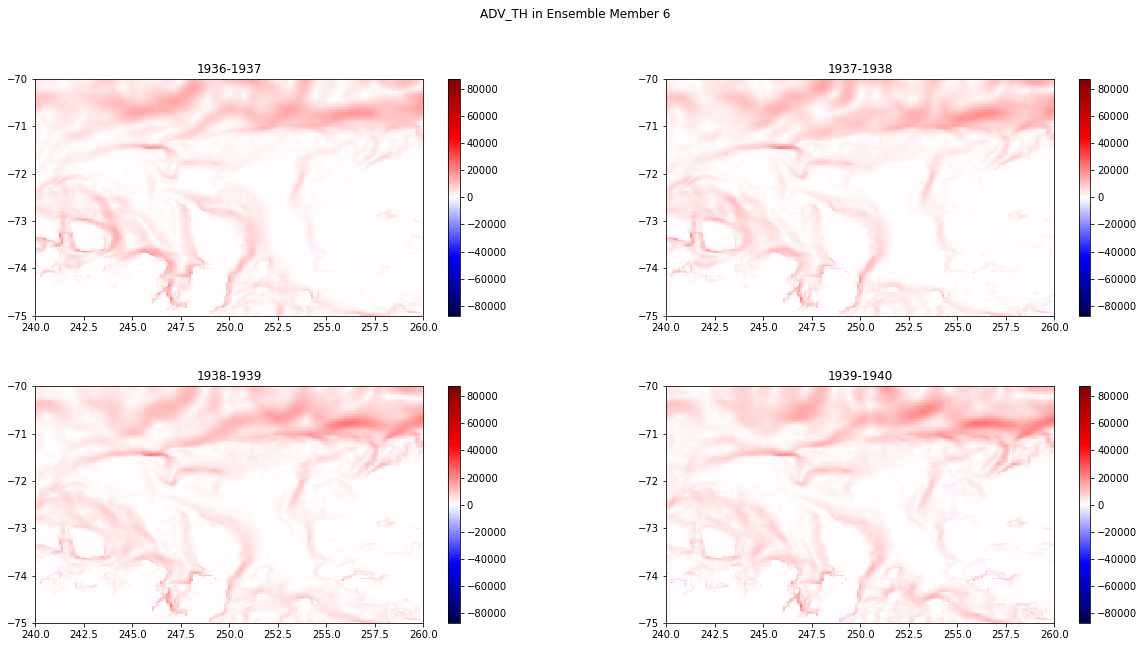

In [76]:
var='ADV_TH'

plt.figure(figsize=(20,10))
plt.suptitle(var+' in Ensemble Member '+str(members[-1]))

maxim=float(np.nanquantile(data3.sel(time=slice(str(years[0]),str(years[-1]))), 0.99))

for i, year in enumerate([1936, 1937, 1938, 1939]):
    plt.subplot(2,2,i+1)
    plt.pcolor(data3.XG, data3.YC, np.sqrt(data3.sel(time=slice(str(year),str(year+1))).mean(dim='time').values**2+data2.sel(time=slice(str(year),str(year+1))).mean(dim='time').values**2), cmap='seismic', vmin=-maxim, vmax=+maxim)
    plt.colorbar()
    plt.title(str(year)+'-'+str(year+1))
    plt.xlim([240, 260])
    plt.ylim([-75, -70])
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [31]:
a=(data_dt[var]-data_dt[var].mean(dim='ens')).values[0,12:-12,150,150]
print(a)

[0. 0. 0. ... 0. 0. 0.]


In [28]:
l=xr.open_dataset('./data/bottom100m_averaged_VVEL_ens6.nc')

In [86]:

import pandas as pd
a=pd.to_datetime('1939')+pd.DateOffset(months=3)
a.strftime('%Y-%m')



'1939-04'

In [32]:
l['VVEL'].sel(time='1940').values

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00077926, -0.05817018, -0.06157707, ..., -0.01203805,
         -0.00646792, -0.01219091],
        [-0.00598635, -0.06065409, -0.03407019, ..., -0.01598854,
         -0.00697155, -0.01030095],
        [ 0.00102359,  0.00083997, -0.00800259, ..., -0.02048408,
         -0.01436623, -0.00667296]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.00571569, -0.0634601 , -0.03303412, ...,  

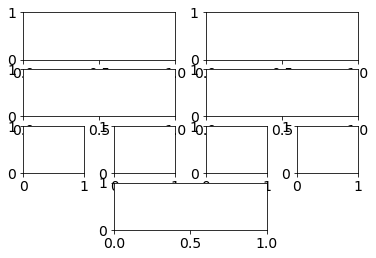

In [54]:
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(30,10))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :2])
ax4 = plt.subplot(gs[1, 2:])
ax5 = plt.subplot(gs[2, 0])
ax6 = plt.subplot(gs[2, 1])
ax7 = plt.subplot(gs[2, 2])
ax8 = plt.subplot(gs[2, 3])
ax9 = plt.subplot(gs[3, 1:3])

Text(0.5, 1.0, 'Ensemble Mean Amundsen Shelf OHC')

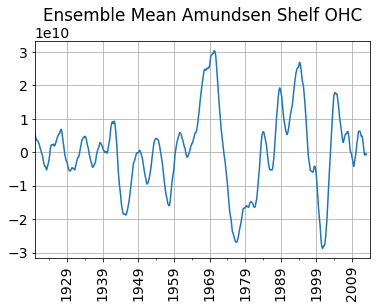

In [109]:
(total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean())['1920':'2013'].plot(grid=True, rot=90)
plt.title('Ensemble Mean Amundsen Shelf OHC', pad=20)